# Steganography

Steganography refers to the process of hiding a secret message within a larger one in such a manner that someone cannot know the presence or contents of the hidden message. The objective of Steganography is to maintain secret communication between two parties.

Unlike Cryptography, where we can conceal the contents of a secret message, Steganography conceals the fact that a message is transmitted.

## Core Concepts in Steganography
**Payload Capacity:**

This refers to the amount of secret data that can be embedded into a cover medium (e.g., an image, audio, or video) without significantly altering its perceptual quality. Higher payload capacity allows more data to be hidden but may compromise imperceptibility.

**Imperceptibility:**

This is the ability to hide data in such a way that the presence of the hidden information is undetectable by human senses or automated systems. The goal is to ensure that the cover medium (e.g., an image) looks or sounds the same before and after embedding the secret data.

**Robustness:**

This refers to the ability of the hidden data to withstand various types of attacks or modifications, such as compression, cropping, or noise addition. Robust steganography ensures that the hidden data can still be extracted even after such transformations.

## Key Evaluation Metrics

### 1. **Imperceptibility Metrics**
These metrics measure how well the stego image (image with hidden data) preserves the visual quality of the cover image (original image).

#### a) **Peak Signal-to-Noise Ratio (PSNR)**
- **Definition**: PSNR measures the ratio between the maximum possible power of a signal (the cover image) and the power of noise (the difference between the cover and stego images).
- **Interpretation**: Higher PSNR values indicate better quality (less distortion). A PSNR above 30 dB is generally considered acceptable.
- $PSNR=10⋅log10​(MAX^2 / MSE)$
  
  where `MAX` is the maximum possible pixel value (e.g., 255 for 8-bit images), and `MSE` is the Mean Squared Error.

#### b) **Structural Similarity Index (SSIM)**
- **Definition**: SSIM measures the similarity between the cover and stego images based on luminance, contrast, and structure.
- **Interpretation**: SSIM ranges from -1 to 1, where 1 indicates perfect similarity. Values closer to 1 indicate better imperceptibility.

#### c) **Mean Squared Error (MSE)**
- **Definition**: MSE measures the average squared difference between the pixel values of the cover and stego images.
- **Interpretation**: Lower MSE values indicate less distortion and better imperceptibility.

#### d) **Pixel Loss (Cover-Stego)**
- **Definition**: Measures the Mean Absolute Error (MAE) between the cover and stego images.
- **Interpretation**: Lower MAE values indicate less distortion and better imperceptibility.

---

### 2. **Payload Capacity Metrics**
These metrics measure how much data can be embedded in the cover image.

#### a) **Embedding Capacity**
- **Definition**: The maximum amount of data (in bits) that can be embedded in the cover image.
- **Interpretation**: Higher capacity is desirable, but it often comes at the cost of reduced imperceptibility or robustness.

#### b) **Embedding Rate**
- **Definition**: The ratio of the number of embedded bits to the total number of pixels in the image.
- **Interpretation**: Higher embedding rates indicate more efficient use of the cover image.

---

### 3. **Robustness Metrics**
These metrics measure how well the hidden data can withstand attacks or modifications.

#### a) **Bit Error Rate (BER)**
- **Definition**: The ratio of incorrectly extracted bits to the total number of embedded bits.
- **Interpretation**: Lower BER values indicate better robustness.

#### b) **Robustness to Attacks**
- **Definition**: Measures the ability of the steganographic method to resist common attacks such as compression, noise addition, cropping, or filtering.
- **Evaluation**: Perform attacks on the stego image and measure the BER or success rate of data extraction.

#### c) **NC (Normalized Correlation)**
- **Definition**: Measures the similarity between the original secret and the revealed secret.
- **Interpretation**: NC ranges from **-1 to 1**, where **1** indicates perfect correlation.

#### d) **Pixel Loss (Secret-Revealed)**
- **Definition**: Measures the MAE between the original secret and the revealed secret.
- **Interpretation**: Lower MAE values indicate less distortion and better imperceptibility.

---

### 4. **Security Metrics**
These metrics measure how difficult it is for an attacker to detect or extract the hidden data.

#### a) **Detection Accuracy**
- **Definition**: The accuracy of steganalysis tools (e.g., machine learning models) in detecting the presence of hidden data.
- **Interpretation**: Lower detection accuracy indicates better security.

#### b) **Statistical Analysis**
- **Definition**: Measures how well the stego image preserves the statistical properties of the cover image (e.g., histogram analysis, chi-square test).
- **Interpretation**: Stego images that closely match the statistical properties of the cover image are harder to detect.

---

### 5. **Computational Complexity**
- **Definition**: Measures the time and resources required to perform embedding and extraction.
- **Interpretation**: Lower computational complexity is desirable, especially for real-time applications.

---

### Example: Evaluating LSB Steganography
For LSB steganography:
- **Imperceptibility**: High PSNR and SSIM values, low MSE.
- **Payload Capacity**: High embedding rate (1 bit per pixel).
- **Robustness**: Low robustness to compression or noise (high BER after attacks).
- **Security**: Vulnerable to statistical analysis and steganalysis tools.


In [ ]:
import cv2
import numpy as np

## Spatial Domain Methods vs Transform Domain Methods

Spatial Domain Methods directly manipulate the pixel values of the cover image. Examples include LSB steganography and pixel-value differencing.

Transform Domain Methods embed data in the frequency domain of the cover medium. Examples include Discrete Cosine Transform (DCT) used in JPEG images and Discrete Wavelet Transform (DWT).

### LSB Text Steganography

LSB (Least Significant Bit) Steganography is one of the simplest and most common methods of hiding data in images. It works by replacing the least significant bits of the pixel values in the cover image with the bits of the secret message. Since the LSBs contribute very little to the overall image, the changes are usually imperceptible.

Advantages: Simple to implement and high payload capacity.

Disadvantages: Not robust to compression or noise.

(Only works with lossless image formats like PNG.)

In [ ]:
def encode_lsb(image_path, message, output_path):
  image = cv2.imread(image_path)

  message += "#####" # Delimiter
  binary_message = ''.join(format(ord(char), '08b') for char in message)
  # The ord function converts the character to it’s ASCII equivalent,
  # format converts this to binary number and join is used to join each converted character to form a string.
  # 08b means 8 binary numbers, including leading zeroes
  message_length = len(binary_message)

  print(f"Image size: {image.size}")
  print(f"Message size: {message_length}")

  flat_image = image.flatten()

  for i in range(message_length):
    flat_image[i] = (flat_image[i] & ~1) | int(binary_message[i])

  stego_image = flat_image.reshape(image.shape)

  cv2.imwrite(output_path, stego_image)
  print(f"Stego image saved to {output_path}")


In [ ]:
encode_lsb("image2.png", "HI, IT'S VARDAN", "stego_image2.png")

Image size: 1920000
Message size: 160
Stego image saved to stego_image2.png


In [ ]:
def decode_lsb(image_path):
  image = cv2.imread(image_path)
  flat_image = image.flatten()

  # Extract LSBs
  binary_message = ""
  for pixel in flat_image:
    binary_message += str(pixel & 1)
    # & 1 operation is a bitwise AND operation.
    # In this case, it's isolating the least significant bit (LSB) of the pixel value

  # Binary to Characters
  message = ""
  for i in range(0, len(binary_message), 8):
    byte = binary_message[i:i+8]
    message += chr(int(byte, 2)) #converts it into its decimal equivalent using base 2
    if message[-5:] == "#####":  # Check for the delimiter
      break

  return message[:-5]


In [ ]:
decode_lsb("stego_image2.png")

"HI, IT'S VARDAN"

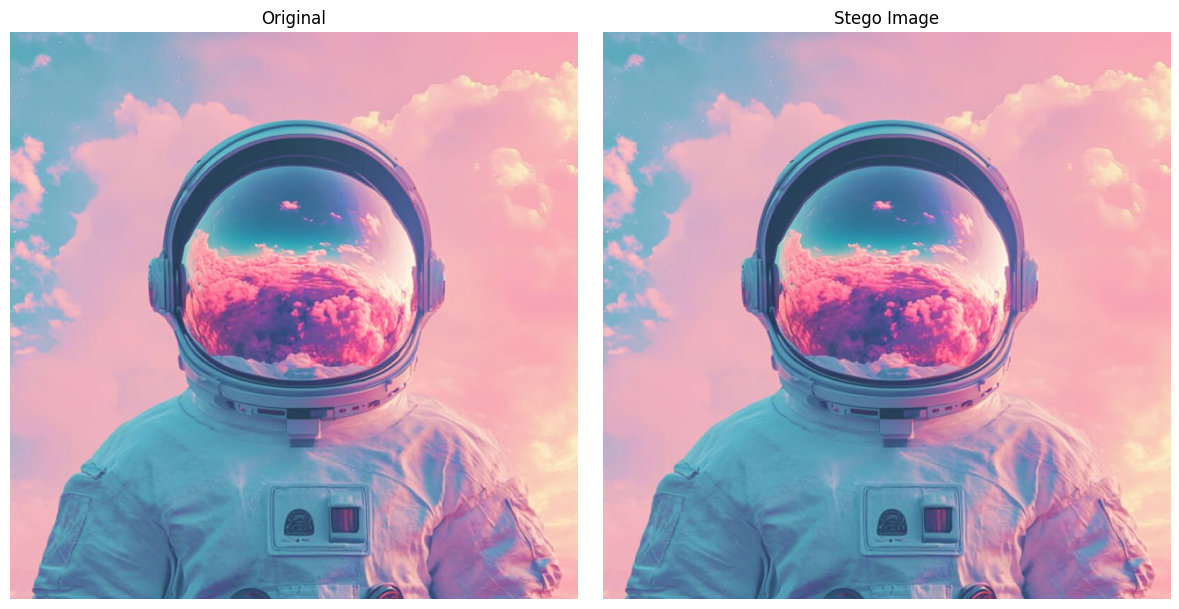

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img1 = mpimg.imread('image2.png')
img2 = mpimg.imread('stego_image2.png')

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(img1)
ax[0].axis('off')
ax[0].set_title("Original")

ax[1].imshow(img2)
ax[1].axis('off')
ax[1].set_title("Stego Image")

plt.tight_layout()
plt.show()
